In [3]:
import numpy.random 
import matplotlib.pyplot as plt
from math import *
from scipy.stats import gamma
import pandas as pd
import numpy as np
import random         
from math import sqrt

In [5]:
# Question 1

Notre echantillon obtenu [4 8 6 ... 3 8 6]


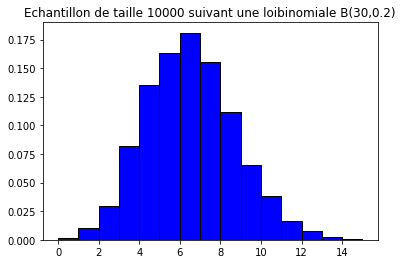

In [6]:
"""loi binomiale"""
nbin=10000                              
X=numpy.random.binomial(30,0.2,nbin)              
print('Notre echantillon obtenu',X)
plist=[0]*30
for i in range(1,30):
    plist[i]=X.tolist().count(i)/nbin    
plt.hist(X,bins=15,color='blue',density=True, edgecolor="k")
plt.title("Echantillon de taille 10000 suivant une loibinomiale B(30,0.2)")
plt.show()

0.19947114020071635


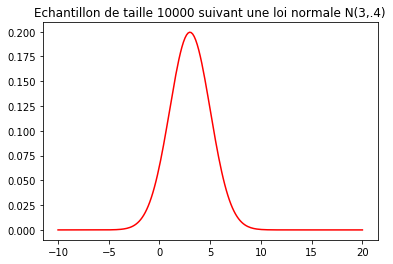

In [7]:
"""loi normale"""

nnorm=10000
simu=numpy.random.normal(3,.4,size=nnorm)
x=np.linspace(-10, 20, 200)
k=1/(2*sqrt(2*pi))
l=(-1/8)*((x-3)**2)
print(k)
puissance=np.exp(l)
y=k*puissance
plt.figure()
plt.plot(x,y, color='red',label='loi normale')
plt.title('Echantillon de taille 10000 suivant une loi normale N(3,.4)')
plt.show()

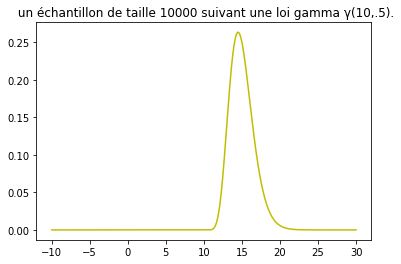

In [8]:
"""loi gama"""

gamma_distribution = gamma(10,10,.5)
x = np.linspace(-10, 30, 10000)
plt.plot(x, gamma_distribution.pdf(x), 'y')
plt.title(' un échantillon de taille 10000 suivant une loi gamma γ(10,.5).')
plt.show()


In [9]:
#Question2

In [12]:
def enregistrementdonnees():
    print('--ENREGISTREMENT\
          Nous avons opté d écrire les données sous formats csv quon va importer grace à pandas')
    donnees=pd.read_csv('stat.csv')
    print(donnees)
enregistrementdonnees()

--ENREGISTREMENT          Nous avons opté d écrire les données sous formats csv quon va importer grace à pandas
   xi  yi 
0  18   55
1   7   17
2  14   36
3  31   85
4  21   62
5   5   18
6  11   33
7  16   41
8  26   63
9  29   87


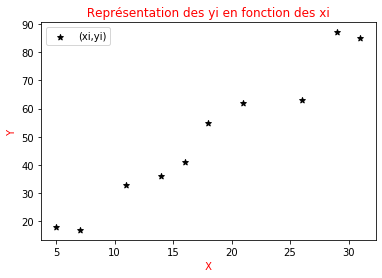

A la vue de cette representation, on ne peut pas supçonner une liason linéaire


In [19]:
def representationdesxiyi():
    plt . scatter ( xi , yi, color='black', marker = '*', label='(xi,yi)')
    plt . xlabel (" X ", color='r')
    plt . ylabel (" Y ",color='r')
    plt . title (" Représentation des yi en fonction des xi ",color='r')
    plt.legend()
    plt.show()
    print('A la vue de cette representation, on ne peut pas supçonner une liason linéaire')
representationdesxiyi()

In [28]:
#Pour etudier la regression linéaire, nous introduisons la notion de
#convariance (d'un couple de variables) puis le coefficient de correlation lineaire
#(un indice de covariation linéaire des deux variables)


def cov(X, Y): 
    sum = 0 
    for j in range(0, len(X)): 
        sum += (X[j]) * (Y[j])
    return (sum/(len(X)))-moyenneX*moyenneY

X = np.array(xi)
Y = np.array(yi)
moyenneX=X.mean() 
moyenneY=Y.mean() 
varianceX=X.var()
varianceY=Y.var()
ecartypeX=X.std()
ecartypeY=Y.std()
covariance=cov(X,Y)
r=covariance/(ecartypeX*ecartypeY)
a=covariance/varianceX
b=moyenneY-a*moyenneX
Z= a*X+ b

In [22]:
def droitedesmoindrescarrés():
    print('Détermination de la droite des moindres carré')     
    print('Soit Z, la droite des moindres carrés telle que Z= aX + B')
    r=covariance/(ecartypeX*ecartypeY)
    a=covariance/varianceX
    b=moyenneY-a*moyenneX
    Z= a*X+ b
    print('La valeur de a est ', a)
    print('La valeur de b est ', b)
    return a*X+ b
droitedesmoindrescarrés()

Détermination de la droite des moindres carré
Soit Z, la droite des moindres carrés telle que Z= aX + B
La valeur de a est  2.734756097560975
La valeur de b est  1.0213414634146503


array([50.24695122, 20.16463415, 39.30792683, 85.79878049, 58.45121951,
       14.69512195, 31.10365854, 44.77743902, 72.125     , 80.32926829])

In [23]:
def ordonnéesdesyiparZ():
    print('Les ordonnées des yi calculés par la droite des moindres carrés correspondant aux différentes valeurs des xi')
    print(Z)
ordonnéesdesyiparZ()

Les ordonnées des yi calculés par la droite des moindres carrés correspondant aux différentes valeurs des xi
[50.24695122 20.16463415 39.30792683 85.79878049 58.45121951 14.69512195
 31.10365854 44.77743902 72.125      80.32926829]


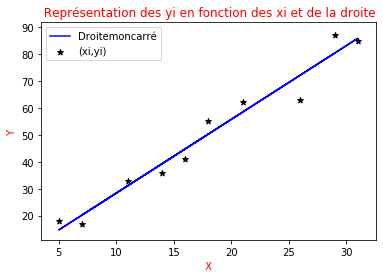

In [24]:
def droitesurmemegraphe():
    plt.plot(X, Z, color='b', label='Droitemoncarré')
    plt . scatter ( xi , yi, color='black', marker = '*', label='(xi,yi)')
    plt . xlabel (" X ", color='r')
    plt . ylabel (" Y ",color='r')
    plt . title (" Représentation des yi en fonction des xi et de la droite",color='r')
    plt.legend()
    plt.show()
droitesurmemegraphe()

In [25]:
def estimation():
    Z21=(2.734756097560975)*21+1.0213414634146503 
    print('Une estimation plausible de Y à xi = 21 est ')
    print(Z21)    
Z21=(2.734756097560975)*21+1.0213414634146503
estimation()


Une estimation plausible de Y à xi = 21 est 
58.451219512195124


In [26]:
def ecartval():   
    ecart=Y[4]-Z21
    print('Lecart entre les deux valeurs de Y appellé RESIDUS est de ',ecart)
ecartval()

Lecart entre les deux valeurs de Y appellé RESIDUS est de  3.5487804878048763


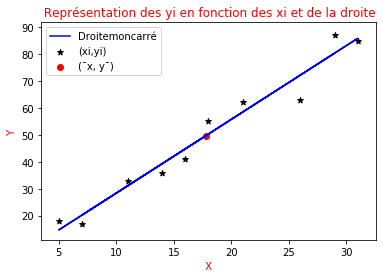

Oui la droite des moindres carrés obtenue en 2 passe par le point moyen (moyenneX,moyenneY)
La droite de régression linéaire passe par le point moyen car la droite se determine à laide de ces variables


In [27]:
def pointmoyen():
    plt.plot(X, Z, color='b', label='Droitemoncarré')
    plt . scatter ( xi , yi, color='black', marker = '*', label='(xi,yi)')
    plt . scatter ( moyenneX , moyenneY, color='red', marker = 'o', label=( '(¯x, y¯) '))
    plt . xlabel (" X ", color='r')
    plt . ylabel (" Y ",color='r')
    plt . title (" Représentation des yi en fonction des xi et de la droite",color='r')
    plt.legend()
    plt.show()
    print('Oui la droite des moindres carrés obtenue en 2 passe par le point moyen (moyenneX,moyenneY)')
    print('La droite de régression linéaire passe par le point moyen car la droite se determine à laide de ces variables')
pointmoyen()

In [29]:
#Question3

In [31]:
# -*- 1- Enregistrements des données -*-

In [32]:
df = pd.read_csv("smp.csv",decimal=",",delimiter=";" )
print(df)
print(df.dtypes)

      âge                prof  duree  discip  n.enfant  n.fratrie  ecole  \
0    31.0               autre    4.0     0.0       2.0          4    1.0   
1    49.0                 NaN    NaN     0.0       7.0          3    2.0   
2    50.0  prof.intermediaire    5.0     0.0       2.0          2    2.0   
3    47.0             ouvrier    NaN     0.0       0.0          6    1.0   
4    23.0         sans emploi    4.0     1.0       1.0          6    1.0   
..    ...                 ...    ...     ...       ...        ...    ...   
794  28.0         sans emploi    5.0     0.0       1.0          4    1.0   
795  44.0             ouvrier    4.0     1.0       1.0         12    2.0   
796  31.0               cadre    4.0     0.0       3.0          6    4.0   
797  38.0             employe    5.0     0.0       0.0          1    3.0   
798  71.0               autre    4.0     0.0       2.0          4    1.0   

     separation  juge.enfant  place  ...  subst.cons  scz.cons  char   rs  \
0         

In [33]:
# -*- 2- Changements des types de variables -*-
## Transposée du tableau

In [34]:
d = df.T
print(d)
print(d.dtypes)
## J'ai opté pour faire manuellement les chanements de variable pour éviter les problémes de keyError 
print(d.iloc[0]) 
a = d.iloc[1]
a = a.astype('category')
b = d.iloc[2]
b = b.astype('category')
c = d.iloc[3]
c = c.astype('category')
f = d.iloc[6]
f = f.astype('category')
g = d.iloc[7]
g = g.astype('category')
h = d.iloc[8]
h = h.astype('category')
i = d.iloc[9]
i = i.astype('category')
j = d.iloc[10]
j = j.astype('category')
k = d.iloc[11]
k = k.astype('category')
l = d.iloc[12]
l = l.astype('category')
m = d.iloc[13]
m = m.astype('category')
n = d.iloc[14]
n = n.astype('category')
o = d.iloc[15]
o = o.astype('category')
p = d.iloc[16]
p = p.astype('category')
q = d.iloc[17]
q = q.astype('category')
r = d.iloc[18]
r = r.astype('category')
s = d.iloc[19]
s = s.astype('category')
t = d.iloc[20]
t = t.astype('category')
u = d.iloc[21]
u = u.astype('category')
v = d.iloc[23]
v = v.astype('category')
w = d.iloc[24]
w = w.astype('category')
x = d.iloc[4]
x = x.astype('float64')
y = d.iloc[5]
y = y.astype('int64')
z = d.iloc[22]
z = z.astype('float64')
e = d.iloc[25]
e = e.astype('float64')
zz = d.iloc[0]
zz = zz.astype('float64')


print('âge         ',zz.dtypes)
print('prof         ',a.dtypes)
print('durée        ',b.dtypes)
print('discip       ',c.dtypes)
print('n.enfant     ',x.dtypes)
print('n.fratrie    ',y.dtypes)
print('ecole        ',f.dtypes)
print('séparation   ',g.dtypes)
print('juge.enfant  ',h.dtypes)
print('lieu         ',i.dtypes)
print('abus         ',j.dtypes)
print('grav.cons    ',k.dtypes)
print('dep.cons     ',l.dtypes)
print('ago.cons     ',m.dtypes)
print('ptsd.cons    ',n.dtypes)
print('alc.cons     ',o.dtypes)
print('subst. contre',p.dtypes)
print('scz.cons     ',q.dtypes)
print('char         ',r.dtypes)
print('rs           ',s.dtypes)
print('ed           ',t.dtypes)
print('dr           ',u.dtypes)
print('suicide.s    ',z.dtypes)
print('suicide.hr   ',v.dtypes)
print('suicide.past ',w.dtypes)
print('dur.interv   ',e.dtypes)



                0    1                   2        3            4        5    \
âge              31   49                  50       47           23       34   
prof          autre  NaN  prof.intermediaire  ouvrier  sans emploi  ouvrier   
duree             4  NaN                   5      NaN            4      NaN   
discip            0    0                   0        0            1        0   
n.enfant          2    7                   2        0            1        3   
n.fratrie         4    3                   2        6            6        2   
ecole             1    2                   2        1            1        2   
separation        0    1                   0        1            1        0   
juge.enfant       0    0                   0        0          NaN        0   
place             0    0                   0        1            1        0   
abus              0    0                   0        0            0        0   
grav.cons         1    2                   2        

In [35]:
# -*- 3- Moyenne, Variance, Ecart type, 3 premiers quantiles -*-

In [36]:
## Moyenne
moyâge = np.mean(df.âge)## En utilisant notre dataframe
print('moyâge = ',moyâge)
moynenfant = np.mean(d.iloc[4])## Ici avec sa transposée 
print('moynenfant = ',moynenfant)
moynfratrie = np.mean(d.iloc[5])
print('moynfratrie = ',moynfratrie)
moydurinterv = np.mean(d.iloc[25])
print('moydurinterv = ',moydurinterv)

## Variance
varage = np. var(df.âge)
print('varage = ',varage)
varnenfant = np. var(d.iloc[4])
print('varnenfant = ',varnenfant)
varnfratrie = np. var(d.iloc[5])
print('varnfratrie',varnfratrie)
vardurinterv = np. var(d.iloc[25])
print('vardurinterv = ',vardurinterv)

## Ecart type
ectage = np.std(df.âge)
print('ectage = ',ectage)
ectnenfant = np.std(d.iloc[4])
print('ectnenfant = ',ectnenfant)
ectnfratrie = np.std(d.iloc[5])
print('ectnfratrie = ',ectnfratrie)
ectdurinterv = np.std(d.iloc[25])
print('ectdurinterv = ',ectdurinterv)

## Les 3 premiers quantiles de la variable age
Q1 = np.nanquantile(df.âge, [0.25])
print('Q1 = ',Q1)
Q2 = np.nanquantile(df.âge, [0.5])
print('Q2 = ',Q2)
Q3 = np.nanquantile(df.âge, [0.25])
print('Q3 = ',Q3)

moyâge =  38.89962358845671
moynenfant =  1.7554980595084089
moynfratrie =  4.286608260325407
moydurinterv =  61.89185580774366
varage =  176.1630738859178
varnenfant =  3.3593649847957168
varnfratrie 11.828994628767811
vardurinterv =  386.37682285771325
ectage =  13.27264381673515
ectnenfant =  1.8328570551998093
ectnfratrie =  3.4393305495063733
ectdurinterv =  19.65647025428811
Q1 =  [28.]
Q2 =  [37.]
Q3 =  [28.]


In [37]:
# -*- 4- Boxplot pour la variable age -*-

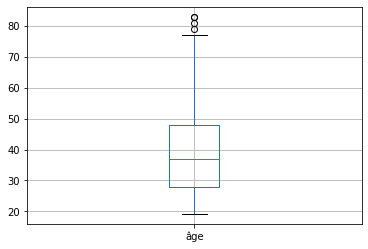

In [38]:
df.boxplot(column="âge")

In [39]:
# -*- Conclusion -*-
"""cette boîte à moustaches des ages indique que l'age médiane est de 37. 
L'age de la plupart des sujets est située entre 28 et 48,
mais l'age de certains sujets peut baisser jusqu'à 18 ou atteindre 83."""


"cette boîte à moustaches des ages indique que l'age médiane est de 37. \nL'age de la plupart des sujets est située entre 28 et 48,\nmais l'age de certains sujets peut baisser jusqu'à 18 ou atteindre 83."

In [40]:
# -*- 5- Données pour les agriculteurs qui ont plus de 2 enfants -*

In [41]:
print(df.loc[d.iloc[4]>2,:])

      âge         prof  duree  discip  n.enfant  n.fratrie  ecole  separation  \
1    49.0          NaN    NaN     0.0       7.0          3    2.0         1.0   
5    34.0      ouvrier    NaN     0.0       3.0          2    2.0         0.0   
6    24.0        autre    NaN     0.0       5.0          3    1.0         1.0   
13   40.0      artisan    4.0     0.0       3.0          5    1.0         0.0   
14   64.0  agriculteur    NaN     0.0       3.0          2    1.0         0.0   
..    ...          ...    ...     ...       ...        ...    ...         ...   
786  70.0        autre    5.0     0.0       3.0          5    1.0         1.0   
787  68.0  sans emploi    5.0     0.0       7.0          0    4.0         0.0   
789  41.0      artisan    5.0     0.0       3.0          5    1.0         NaN   
792  50.0      ouvrier    5.0     0.0       5.0         10    2.0         0.0   
796  31.0        cadre    4.0     0.0       3.0          6    4.0         1.0   

     juge.enfant  place  ..

In [42]:
# -*- 6- Fréquences des modalités de la variable prof, catégorie mondale -*-

In [44]:
effectifs = d.iloc[1].value_counts()
print(effectifs)
modalites = effectifs.index
print(modalites)
print('Fréquences = ',(effectifs.values) / len(df))
## Categorie modale
import statistics as stat
modprof = stat.mode(d.iloc[1])
print(' La categorie modale est: ',modprof)     
 

ouvrier               227
sans emploi           222
employe               135
artisan                90
prof.intermediaire     58
autre                  31
cadre                  24
agriculteur             6
Name: prof, dtype: int64
Index(['ouvrier', 'sans emploi', 'employe', 'artisan', 'prof.intermediaire',
       'autre', 'cadre', 'agriculteur'],
      dtype='object')
Fréquences =  [0.28410513 0.27784731 0.1689612  0.1126408  0.07259074 0.0387985
 0.03003755 0.00750939]
 La categorie modale est:  ouvrier


In [45]:
# -*- 7- Diagramme circulaire de la variable profession  -*-   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002124E318888>],
      dtype=object)

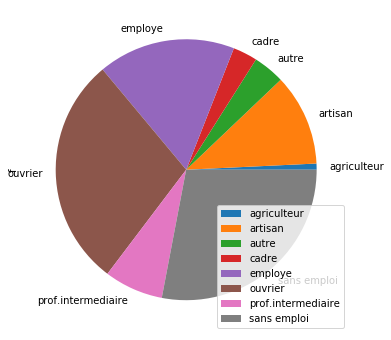

In [46]:
t = pd.crosstab(d.iloc[1], "f")
t.plot.pie(subplots=True, figsize = (6, 6))   

In [47]:
# -*- 8- Moyenne des ages par profession -*-

In [48]:
Moyape_prof=pd.crosstab(d.iloc[1],d.iloc[0],values=d.iloc[0],aggfunc=pd.Series.mean)
print(Moyape_prof)

âge                 19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0  \
prof                                                                       
agriculteur          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
artisan              NaN  20.0   NaN   NaN   NaN  24.0   NaN  26.0  27.0   
autre               19.0  20.0  21.0   NaN  23.0  24.0  25.0  26.0  27.0   
cadre                NaN   NaN   NaN   NaN   NaN   NaN  25.0   NaN   NaN   
employe             19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0   
ouvrier             19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0   
prof.intermediaire  19.0   NaN   NaN  22.0   NaN   NaN   NaN  26.0  27.0   
sans emploi         19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0   

âge                 28.0  ...  69.0  70.0  71.0  72.0  73.0  74.0  77.0  79.0  \
prof                      ...                                                   
agriculteur          NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  79.0

In [49]:
# -*- 9- Table des effectifs pour les variables prof incluant les "NaN"  -*-

In [50]:
## Nous allons remplacer tous les NaN par "none"
dd =d.fillna("none")
print(dd)
effectif = dd.iloc[1].value_counts()
print(effectif)

                0     1                   2        3            4        5    \
âge              31    49                  50       47           23       34   
prof          autre  none  prof.intermediaire  ouvrier  sans emploi  ouvrier   
duree             4  none                   5     none            4     none   
discip            0     0                   0        0            1        0   
n.enfant          2     7                   2        0            1        3   
n.fratrie         4     3                   2        6            6        2   
ecole             1     2                   2        1            1        2   
separation        0     1                   0        1            1        0   
juge.enfant       0     0                   0        0         none        0   
place             0     0                   0        1            1        0   
abus              0     0                   0        0            0        0   
grav.cons         1     2               

In [51]:
# -*- 10- Nombre de "Nan" pour chaque variable -*-

In [52]:
Nbr_nan = effectif.loc["none"]
print('Nombre de Nan = ',Nbr_nan)      

Nombre de Nan =  6


In [53]:
# -*- 11-Suppression des lignes contenant des "nan" -*-

In [54]:
supp = df.dropna()
print(supp)

      âge                prof  duree  discip  n.enfant  n.fratrie  ecole  \
7    52.0             artisan    5.0     0.0       2.0          9    2.0   
8    42.0             ouvrier    4.0     1.0       1.0         12    1.0   
12   21.0             employe    4.0     0.0       0.0          3    2.0   
13   40.0             artisan    4.0     0.0       3.0          5    1.0   
16   60.0  prof.intermediaire    5.0     0.0       2.0          4    2.0   
..    ...                 ...    ...     ...       ...        ...    ...   
793  27.0  prof.intermediaire    4.0     0.0       2.0          0    2.0   
795  44.0             ouvrier    4.0     1.0       1.0         12    2.0   
796  31.0               cadre    4.0     0.0       3.0          6    4.0   
797  38.0             employe    5.0     0.0       0.0          1    3.0   
798  71.0               autre    4.0     0.0       2.0          4    1.0   

     separation  juge.enfant  place  ...  subst.cons  scz.cons  char   rs  \
7         

In [55]:
# -*- 12_Histogramme et densité de la variable age sur la meme figure -*-

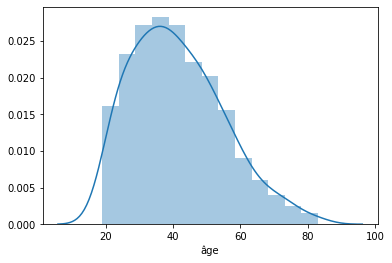

In [56]:
import seaborn

seaborn.distplot(supp.âge)
      

In [57]:
# -*- 13- Discretistaion de la variable age -*-
age_classe=pd.qcut(df.âge,5,labels=["min_age","Q1","Q2","Q3","max_age"])
print(age_classe)    


0           Q1
1           Q3
2           Q3
3           Q3
4      min_age
        ...   
794         Q1
795         Q3
796         Q1
797         Q2
798    max_age
Name: âge, Length: 799, dtype: category
Categories (5, object): [min_age < Q1 < Q2 < Q3 < max_age]


In [58]:
# -*- 14_ fréquences des modalités de la nouvelle variable age_classe -*-
effectifs = age_classe.value_counts()
modalites = effectifs.index 
tab = pd.DataFrame(modalites, columns = ["age_classe"]) 
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(age_classe) 
print(tab)

  age_classe    n         f
0         Q2  171  0.214018
1    min_age  166  0.207760
2         Q1  157  0.196496
3         Q3  156  0.195244
4    max_age  147  0.183980


In [1]:
#Question4

In [4]:
def estimation_de_I2(I, Val_estim, b, n):   
    somme = 0                   
    for i in range(0, n):       
        x = random.uniform(Val_estim, b)
        somme += I2(x)
        
    return somme / n
I2=lambda x: sqrt(1-x**2)

valestin=0
Val_estim=estimation_de_I2(I2,valestin,1,10000)
print("une estimation de I2 pour n=10000 donne",Val_estim)

#Nombre de flechettes lanchées dans le carré unite
n=[10,100,500,1000,5000,10000]
valn=np.array(n)

def observ_suivant_val_n():
    

    for i in range(6):
        valeurnchoisie=n[i]
        print(valeurnchoisie)
        x=np.random.uniform(low=0, high=1, size=[valeurnchoisie,1])
        y=np.random.uniform(low=0, high=1, size=[valeurnchoisie,1])
        plus=y<=np.sqrt(1-x**2)
        pie_sur4=np.sum(plus)/valeurnchoisie
        print("la veur estimée de ¶/4:", pie_sur4,"POUR n=",valeurnchoisie)
        

        xplus=x[plus]
        yplus=y[plus]
        plt.figure(figsize=[5,5])
        plt.scatter(x, y, color='orange')
        plt.scatter(xplus,yplus, color='blue')
        plt.show()

une estimation de I2 pour n=10000 donne 0.7870965707490427


10
la veur estimée de ¶/4: 0.9 POUR n= 10


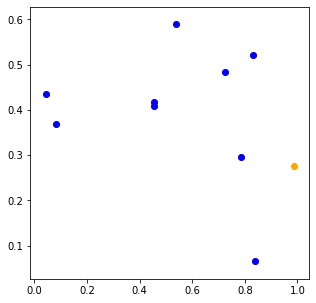

100
la veur estimée de ¶/4: 0.83 POUR n= 100


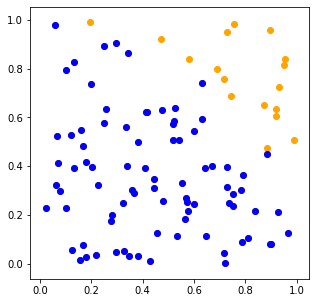

500
la veur estimée de ¶/4: 0.786 POUR n= 500


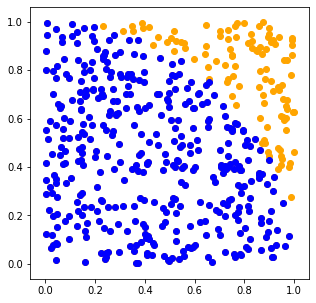

1000
la veur estimée de ¶/4: 0.78 POUR n= 1000


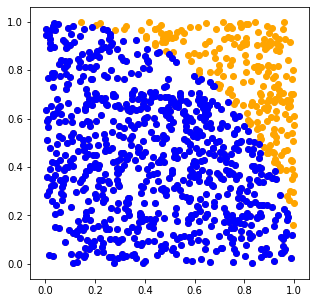

5000
la veur estimée de ¶/4: 0.777 POUR n= 5000


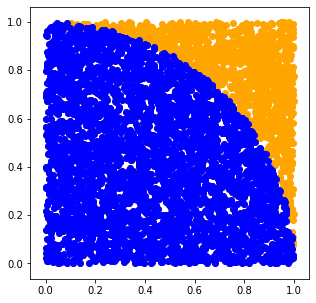

10000
la veur estimée de ¶/4: 0.7843 POUR n= 10000


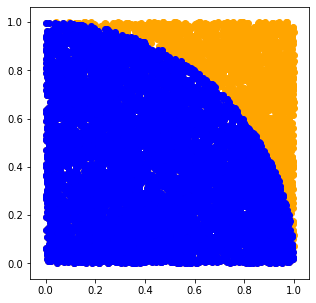

In [5]:
observ_suivant_val_n()